#  Iris Data Set 
http://archive.ics.uci.edu/ml/datasets/Iris

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(iris.data)
df[4] = y
df.columns = ['sepal length (cm)',
             'sepal width (cm)',
             'petal length (cm)',
             'petal width (cm)', 'type']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

nn = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(5), 
                   learning_rate_init=0.2, max_iter=10000, learning_rate='adaptive')

nn.fit(X_train, y_train)

nn.score(X_test, y_test)

0.2894736842105263

In [4]:
nn.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

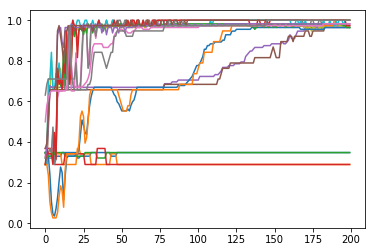

In [5]:
hidden_layer_sizes = [(10,2), (10), (5,5)]
learning_rate_init = [0.2, 0.1, 0.01]

classifiers = []

for layers in hidden_layer_sizes:
    for lri in learning_rate_init: 
        classifiers.append(MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=layers, 
                                         learning_rate_init=lri, max_iter=500, learning_rate='adaptive'))

        
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 200
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []


for clf in classifiers:
    epoch = 0
    clf_scores_train = []
    clf_scores_test = []
    for epoch in range(N_EPOCHS):
        clf.partial_fit(X_train, y_train, classes=N_CLASSES)
        
        clf_scores_train.append(clf.score(X_train, y_train))

        clf_scores_test.append(clf.score(X_test, y_test))
        
    scores_train.append(clf_scores_train)
    scores_test.append(clf_scores_test)

    
for sc_train, sc_test in zip(scores_train, scores_test):
    plt.plot(sc_train)
    plt.plot(sc_test)
    
plt.show()

In [6]:
#parametri che voglio testare tramite ricerca esaustiva con GridSearchCV 
params = {
    'hidden_layer_sizes': [(10,2), (10), (5,5)],
    'learning_rate_init' : [0.2, 0.1, 0.01,]
}

#MLP di partenza
mlp = MLPClassifier(activation='relu', solver='sgd', max_iter=10000, learning_rate='adaptive')

#testo i diversi parametri con 5-fold cross validation 
clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5, )
clf.fit(X, y)

print("Best estimator: ", clf.best_estimator_)

#testo come funziona il migliore stimatore trovato con 5-fold cross validation
scores = cross_val_score(clf, X, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best estimator:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Accuracy: 0.98 (+/- 0.03)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

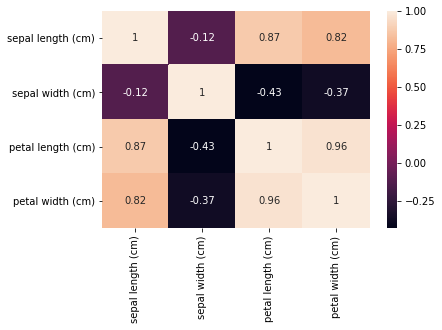

In [8]:
sns.heatmap(df[df.columns[:-1]].corr(), annot = True)
plt.show()

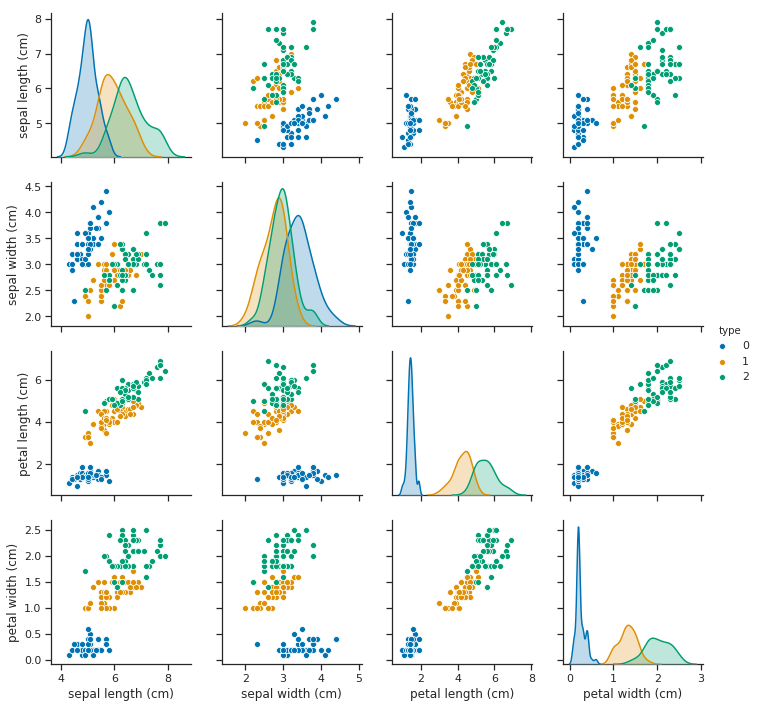

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
 
sns.pairplot(df, palette="colorblind", diag_kind="kde", hue='type', x_vars=df.columns[:-1], y_vars=df.columns[:-1])
plt.show()

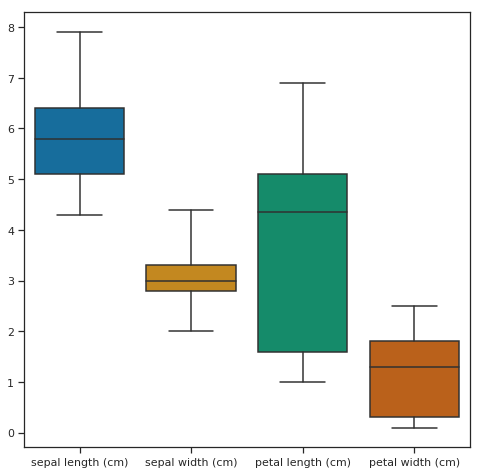

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df.iloc[:,:-1], palette='colorblind', orient='v', whis='range')
plt.show()

In [11]:
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [12]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(3):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(iris.target_names[i]), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

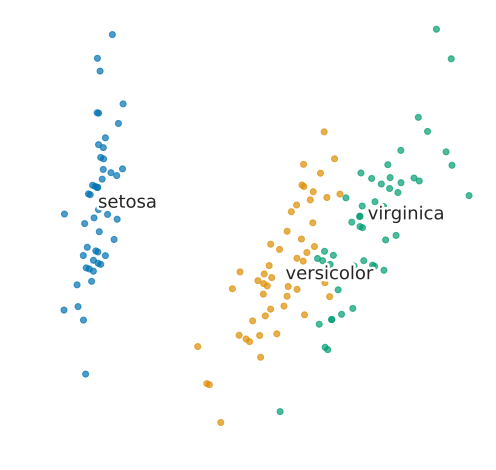

In [13]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

In [14]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

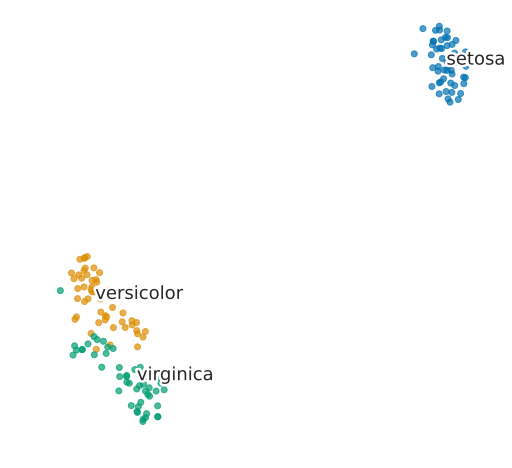

In [15]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()

Text(0.06, 0.5, 'Note')

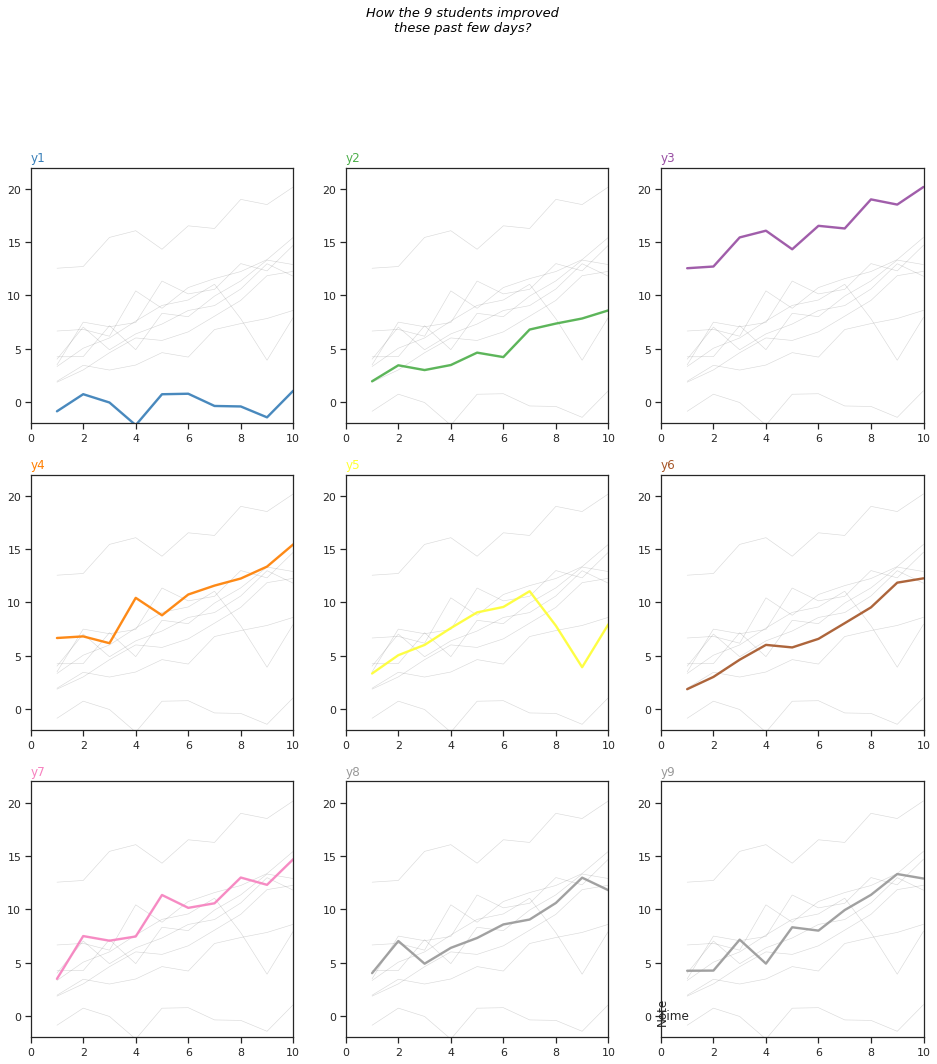

In [16]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
plt.figure(figsize=(16,16))
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
#plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)

    
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

Text(0, 0, 'Note')

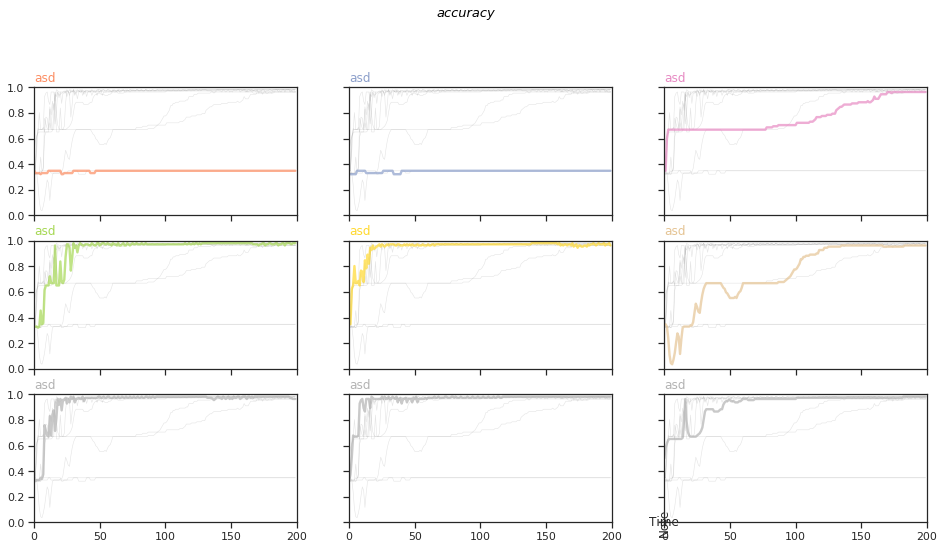

In [36]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
plt.figure(figsize=(16,8))

# Initialize the figure
#plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')
 
# multiple line plot
num=0
for scores in scores_train:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    #plt.plot(scores, marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    for sc in scores_train:
        if sc != scores:
            plt.plot(sc, marker='', color='grey', linewidth=0.6, alpha=0.2)
            
    plt.plot(scores, marker='', color=palette(num), linewidth=2.4, alpha=0.7, label=column)

 
    # Same limits for everybody!
    plt.xlim(0,200)
    plt.ylim(0,1)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
        
    #plt.axis('off')
 
    # Add title
    plt.title("asd", loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("accuracy", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.0, 0.00, 'Time', ha='center', va='center')
plt.text(0, 0, 'Note', ha='center', va='center', rotation='vertical')